In [77]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use("bmh")
plt.rc('font', family='SimHei', size=13) #显示中文
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

In [78]:
train=pd.read_csv('train_dataset.csv')
test=pd.read_csv('test_dataset.csv')
data = pd.concat([train, test], ignore_index=True)
data.head(3).append(data.tail(2)) #查看数据前几行+后几行

,信用分,当月旅游资讯类应用使用次数,当月是否体育场馆消费,当月是否到过福州山姆会员店,当月是否景点游览,当月是否看电影,当月是否逛过福州仓山万达,当月火车类应用使用次数,当月物流快递类应用使用次数,当月网购类应用使用次数,当月视频播放类应用使用次数,当月通话交往圈人数,当月金融理财类应用使用总次数,当月飞机类应用使用次数,是否4G不健康客户,是否大学生客户,是否经常逛商场的人,是否黑名单客户,用户实名制是否通过核实,用户年龄,用户当月账户余额（元）,用户最近一次缴费距今时长（月）,用户编码,用户网龄（月）,用户话费敏感度,用户账单当月总费用（元）,用户近6个月平均消费值（元）,缴费用户当前是否欠费缴费,缴费用户最近一次缴费金额（元）,近三个月月均商场出现次数
0,664.0,30,1,0,1,0,0,0,0,713,7145,83,2740,0,0,0,1,0,1,44,180,1,a4651f98c82948b186bdcdc8108381b4,186,3,159.2,163.86,0,99.80,75
1,530.0,0,0,0,0,0,0,0,0,414,44862,21,2731,0,1,0,1,0,1,18,110,1,aeb10247db4e4d67b2550bbc42ff9827,5,3,145.1,153.28,0,29.94,16
2,643.0,1,0,0,0,0,0,0,0,3391,4804,59,0,0,0,0,0,0,1,47,70,1,5af23a1e0e77410abb25e9a7eee510aa,145,1,120.2,109.64,0,49.90,1
99998,NaN,30,0,0,0,0,0,0,0,478,3188,5,177,0,0,0,0,0,1,29,20,1,1d0d9e079f164620bb84c9b1091de654,7,3,86.0,62.68,0,29.94,0
99999,NaN,0,0,0,0,0,0,0,0,5,820,1,0,0,1,0,1,0,1,41,40,1,e9b5e148e5cc4993bd990cbf15a9c0e6,16,3,61.0,58.71,0,9.98,38


# 全面探索

## 总体概况

In [79]:
""" 数据属性 """
data.info() #可以看出没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
信用分                50000 non-null float64
当月旅游资讯类应用使用次数      100000 non-null int64
当月是否体育场馆消费         100000 non-null int64
当月是否到过福州山姆会员店      100000 non-null int64
当月是否景点游览           100000 non-null int64
当月是否看电影            100000 non-null int64
当月是否逛过福州仓山万达       100000 non-null int64
当月火车类应用使用次数        100000 non-null int64
当月物流快递类应用使用次数      100000 non-null int64
当月网购类应用使用次数        100000 non-null int64
当月视频播放类应用使用次数      100000 non-null int64
当月通话交往圈人数          100000 non-null int64
当月金融理财类应用使用总次数     100000 non-null int64
当月飞机类应用使用次数        100000 non-null int64
是否4G不健康客户          100000 non-null int64
是否大学生客户            100000 non-null int64
是否经常逛商场的人          100000 non-null int64
是否黑名单客户            100000 non-null int64
用户实名制是否通过核实        100000 non-null int64
用户年龄               100000 non-null int64
用户当月账户余额（元）        100000 non-null int64
用户最近一次缴费距今时长（月）    100000 no

In [80]:
print("共有数据集：", data.shape[0])
print("共有测试集：", test.shape[0])
print("共有训练集：", train.shape[0])

共有数据集： 100000
共有测试集： 50000
共有训练集： 50000


In [81]:
# 查看缺失值情况
def missing_values(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'missingNum'})
    alldata_na['existNum'] = len(df) - alldata_na['missingNum']
    alldata_na['sum'] = len(df)
    alldata_na['missingRatio'] = alldata_na['missingNum']/len(df)*100
    alldata_na['dtype'] = df.dtypes
    #ascending：默认True升序排列；False降序排列
    alldata_na = alldata_na[alldata_na['missingNum']>0].reset_index().sort_values(by=['missingNum','index'],ascending=[False,True])
    alldata_na.set_index('index',inplace=True)
    return alldata_na

missing_values(train)

,missingNum,existNum,sum,missingRatio,dtype
index,,,,,


In [82]:
""" 统计每个特征有多少个类别 """
for i,name in enumerate(data.columns):
    
    name_sum = data[name].value_counts().shape[0] 
    print("{}、{}      特征类别个数是：{}".format(i + 1, name, name_sum))

1、信用分      特征类别个数是：278
2、当月旅游资讯类应用使用次数      特征类别个数是：934
3、当月是否体育场馆消费      特征类别个数是：2
4、当月是否到过福州山姆会员店      特征类别个数是：2
5、当月是否景点游览      特征类别个数是：2
6、当月是否看电影      特征类别个数是：2
7、当月是否逛过福州仓山万达      特征类别个数是：2
8、当月火车类应用使用次数      特征类别个数是：180
9、当月物流快递类应用使用次数      特征类别个数是：239
10、当月网购类应用使用次数      特征类别个数是：8382
11、当月视频播放类应用使用次数      特征类别个数是：16067
12、当月通话交往圈人数      特征类别个数是：554
13、当月金融理财类应用使用总次数      特征类别个数是：7232
14、当月飞机类应用使用次数      特征类别个数是：209
15、是否4G不健康客户      特征类别个数是：2
16、是否大学生客户      特征类别个数是：2
17、是否经常逛商场的人      特征类别个数是：2
18、是否黑名单客户      特征类别个数是：2
19、用户实名制是否通过核实      特征类别个数是：2
20、用户年龄      特征类别个数是：88
21、用户当月账户余额（元）      特征类别个数是：316
22、用户最近一次缴费距今时长（月）      特征类别个数是：2
23、用户编码      特征类别个数是：100000
24、用户网龄（月）      特征类别个数是：283
25、用户话费敏感度      特征类别个数是：6
26、用户账单当月总费用（元）      特征类别个数是：16597
27、用户近6个月平均消费值（元）      特征类别个数是：22520
28、缴费用户当前是否欠费缴费      特征类别个数是：2
29、缴费用户最近一次缴费金额（元）      特征类别个数是：532
30、近三个月月均商场出现次数      特征类别个数是：93


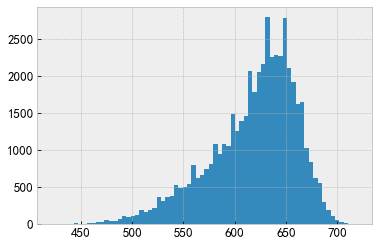

In [83]:
""" 查看训练集中信用分的统计信息及分布 """

train['信用分'].hist(bins=70)

In [84]:
""" 数据统计 """
data.describe()

,信用分,当月旅游资讯类应用使用次数,当月是否体育场馆消费,当月是否到过福州山姆会员店,当月是否景点游览,当月是否看电影,当月是否逛过福州仓山万达,当月火车类应用使用次数,当月物流快递类应用使用次数,当月网购类应用使用次数,当月视频播放类应用使用次数,当月通话交往圈人数,当月金融理财类应用使用总次数,当月飞机类应用使用次数,是否4G不健康客户,是否大学生客户,是否经常逛商场的人,是否黑名单客户,用户实名制是否通过核实,用户年龄,用户当月账户余额（元）,用户最近一次缴费距今时长（月）,用户网龄（月）,用户话费敏感度,用户账单当月总费用（元）,用户近6个月平均消费值（元）,缴费用户当前是否欠费缴费,缴费用户最近一次缴费金额（元）,近三个月月均商场出现次数
count,50000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,618.053060,19.394650,0.374730,0.02705,0.47546,0.243800,0.039230,0.564590,1.025860,1161.142610,3.386321e+03,48.211110,975.36609,0.649760,0.088690,0.003620,0.330720,0.048500,0.991240,37.907910,115.684600,0.701420,96.271580,3.352980,99.709021,98.983241,0.051830,53.721932,26.507030
std,42.443022,312.587384,0.484056,0.16223,0.49940,0.429376,0.194143,7.973381,37.482212,4300.092242,1.074417e+04,54.867465,2965.36056,22.299903,0.284297,0.060058,0.470475,0.214821,0.093184,11.625008,448.684984,0.457637,59.112782,1.241129,65.314169,61.002422,0.221685,62.214807,32.739661
min,422.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,594.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000e+01,16.000000,6.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,40.000000,0.000000,48.000000,2.000000,53.000000,54.320000,0.000000,0.000000,1.000000
50%,627.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,248.000000,3.340000e+02,32.000000,265.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000,70.000000,1.000000,94.000000,4.000000,90.000000,89.670000,0.000000,49.900000,8.000000
75%,649.000000,4.000000,1.000000,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,934.000000,2.440000e+03,62.000000,1145.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,45.000000,130.000000,1.000000,139.000000,4.000000,134.627500,131.560000,0.000000,99.800000,49.000000
max,719.000000,87681.000000,1.000000,1.00000,1.00000,1.000000,1.000000,775.000000,8235.000000,417536.000000,1.382227e+06,1906.000000,496238.00000,5856.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,109090.000000,1.000000,288.000000,5.000000,2117.010000,1792.740000,1.000000,1000.000000,92.000000


In [85]:
""" 观察训练/测试集数据同分布状况 """
train.describe()

,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,114.172400,0.052540,3.351920,48.054500,0.329500,26.572520,0.038700,0.027120,0.242280,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,304.063961,0.223116,1.241202,54.208524,0.470036,32.789251,0.192881,0.162435,0.428467,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,130.000000,0.000000,4.000000,61.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,49040.000000,1.000000,5.000000,1906.000000,1.000000,92.000000,1.000000,1.000000,1.000000,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


In [86]:
test.describe()

,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000
mean,0.992260,37.932380,0.003520,0.048200,0.088800,96.094480,0.702740,54.027936,99.234402,99.842912,117.196800,0.051120,3.354040,48.367720,0.331940,26.441540,0.039760,0.026980,0.245320,0.476500,0.375340,1173.46996,0.853880,979.229100,3406.12244,0.595100,0.57584,19.672180
std,0.087637,11.636829,0.059226,0.214191,0.284458,59.048962,0.457057,62.614124,61.245686,65.301379,556.938946,0.220245,1.241067,55.518686,0.470914,32.690192,0.195397,0.162027,0.430281,0.499452,0.484215,4586.71334,28.848873,2924.008879,9919.40536,13.025441,8.20404,408.041808
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
25%,1.000000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.450000,53.200000,40.000000,0.000000,2.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.00000,0.000000,5.000000,10.00000,0.000000,0.00000,0.000000
50%,1.000000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,90.000000,90.000000,70.000000,0.000000,4.000000,32.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246.00000,0.000000,263.000000,333.00000,0.000000,0.00000,0.000000
75%,1.000000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,132.000000,135.235000,130.000000,0.000000,4.000000,62.000000,1.000000,49.000000,0.000000,0.000000,0.000000,1.000000,1.000000,935.00000,0.000000,1144.000000,2455.00000,0.000000,0.00000,4.000000
max,1.000000,108.000000,1.000000,1.000000,1.000000,288.000000,1.000000,1000.000000,1792.740000,2117.010000,109090.000000,1.000000,5.000000,1633.000000,1.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,417536.00000,5462.000000,329767.000000,295210.00000,1645.000000,775.00000,87681.000000


# 初级特征探索

## 对每个特征字段查看和简单分析

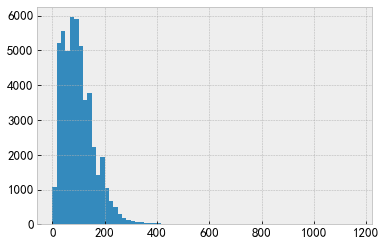

In [87]:
train['用户账单当月总费用（元）'].hist(bins=70)

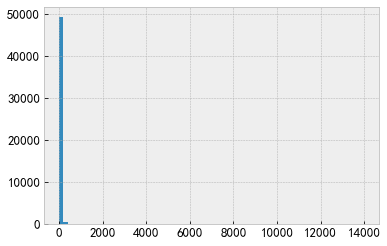

In [88]:
train['当月旅游资讯类应用使用次数'].hist(bins=70)

## 计算每个特征和标签的特征相关度

Text(0.5, 1.0, 'Correlation coefficient of the variables')

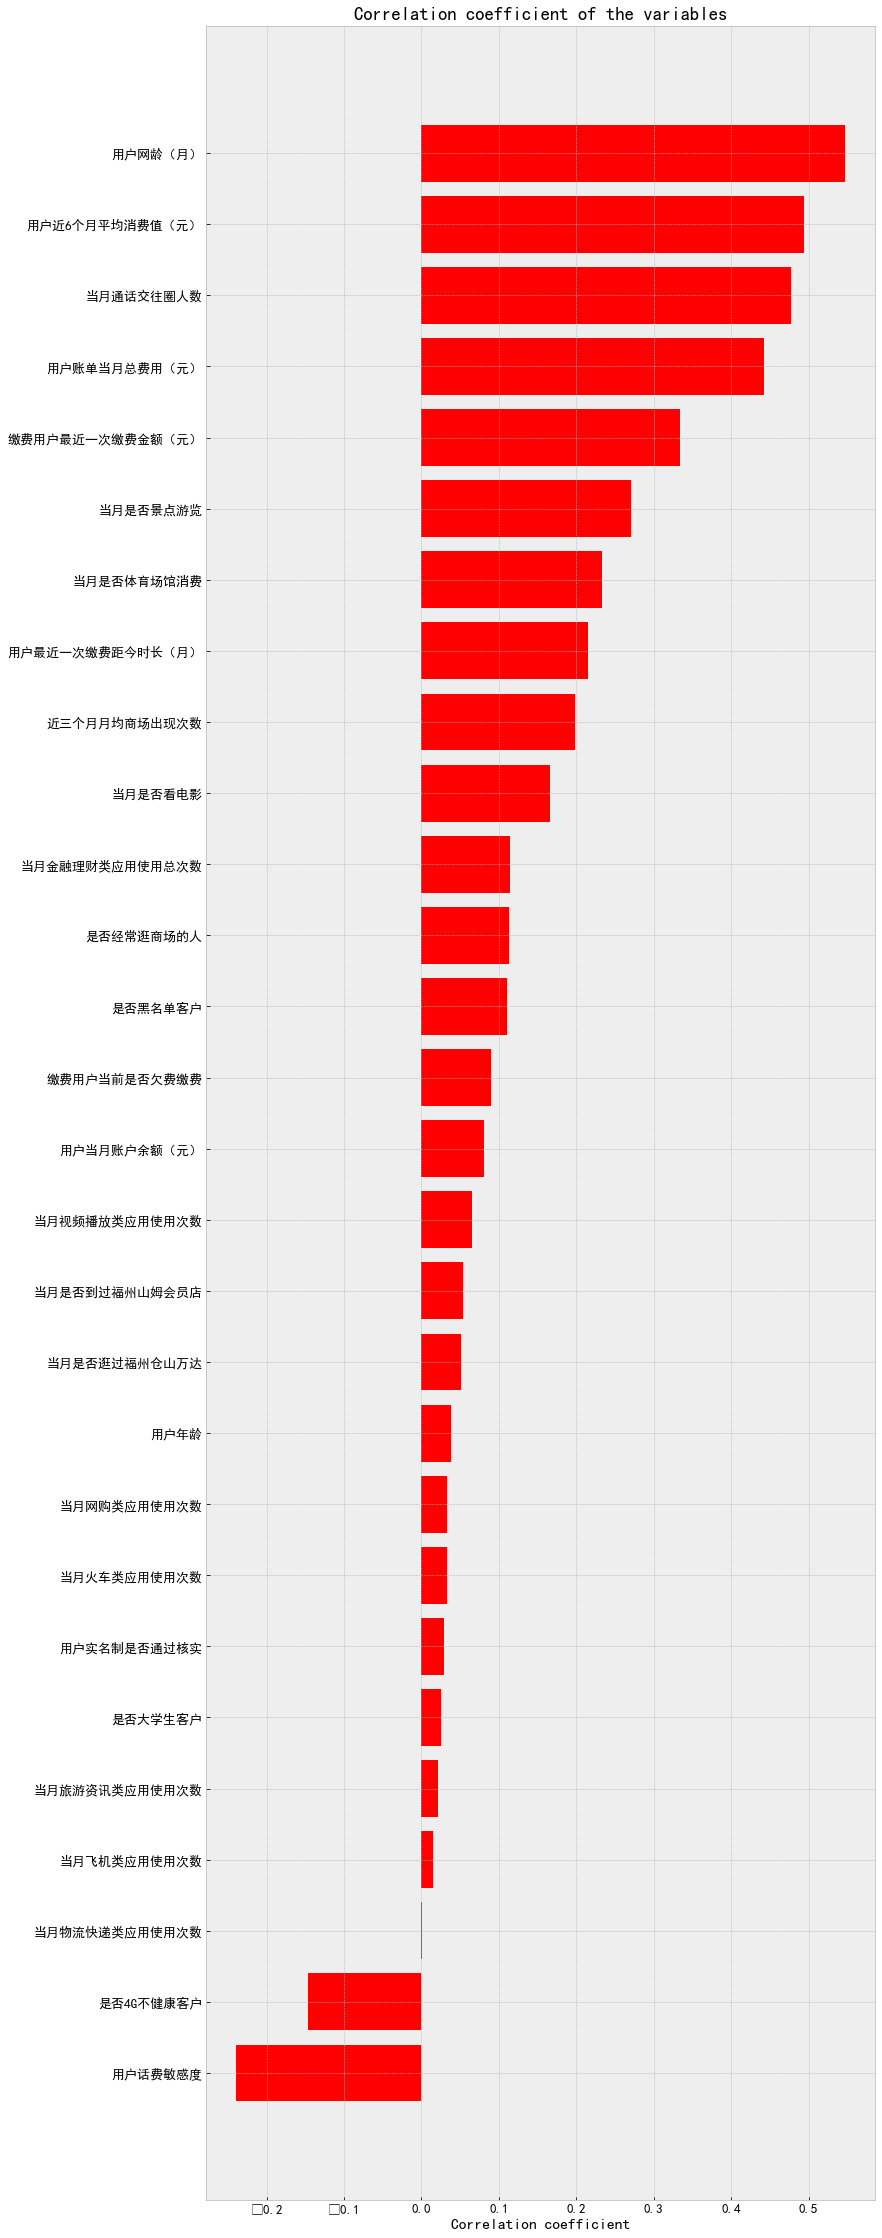

In [89]:
x_cols=[col for col in train.columns if col not in ['信用分'] if train[col].dtype!='object']

labels=[]
values=[]
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train[col].values,train['信用分'].values)[0,1])
    
corr_df=pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df=corr_df.sort_values(by='corr_values')
#print(corr_df)

fig,ax=plt.subplots(figsize=(12,40))
ind=np.arange(len(labels))
rects=ax.barh(ind,corr_df.corr_values.values,color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values,rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')

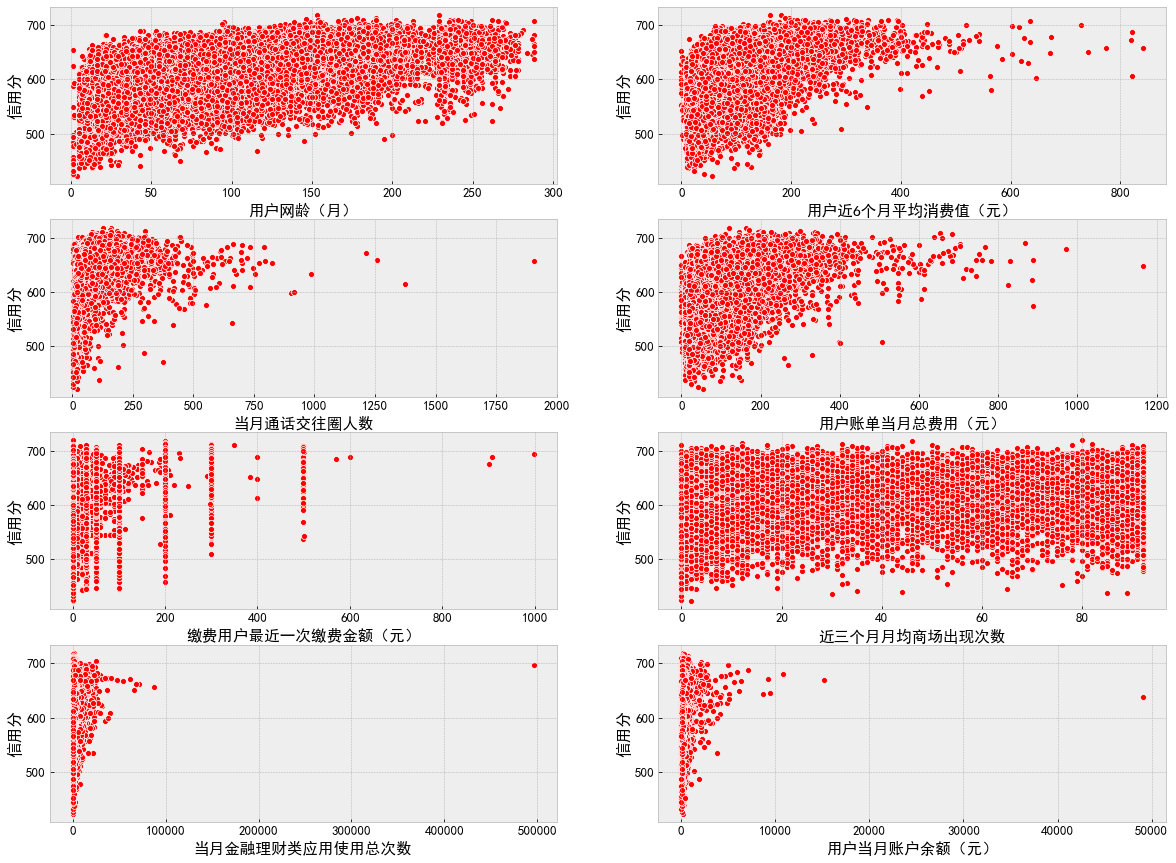

In [90]:
# 连续值特征
name_list=['用户网龄（月）','用户近6个月平均消费值（元）','当月通话交往圈人数','用户账单当月总费用（元）',
           '缴费用户最近一次缴费金额（元）','近三个月月均商场出现次数','当月金融理财类应用使用总次数','用户当月账户余额（元）']
f, ax = plt.subplots(4, 2, figsize=(20, 15))
for i,name in enumerate(name_list):
    sns.scatterplot(data=train, x=name, y='信用分', color='r', ax=ax[i // 2][i % 2])
plt.show()

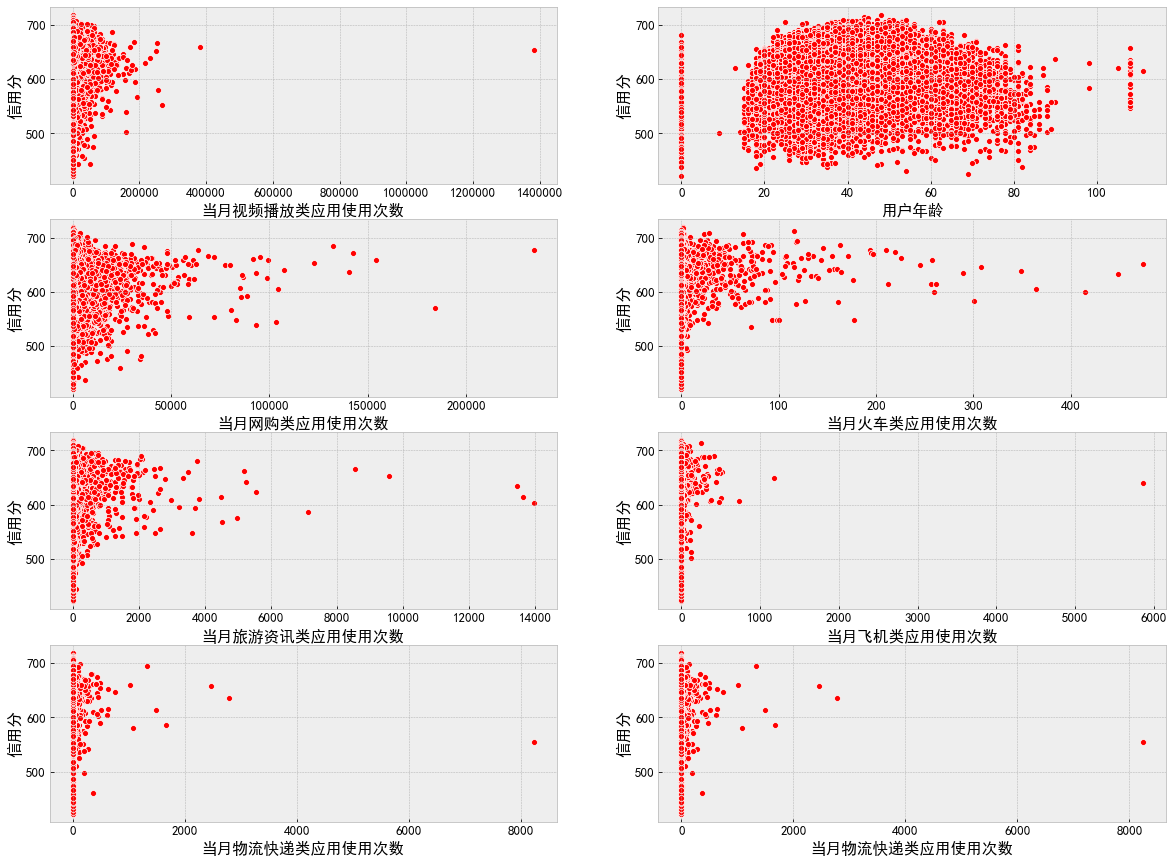

In [91]:
name_list=['当月视频播放类应用使用次数','用户年龄','当月网购类应用使用次数','当月火车类应用使用次数',
           '当月旅游资讯类应用使用次数','当月飞机类应用使用次数','当月物流快递类应用使用次数','当月物流快递类应用使用次数']
f, ax = plt.subplots(4, 2, figsize=(20, 15))
for i,name in enumerate(name_list):
    sns.scatterplot(data=train, x=name, y='信用分', color='r', ax=ax[i // 2][i % 2])
plt.show()

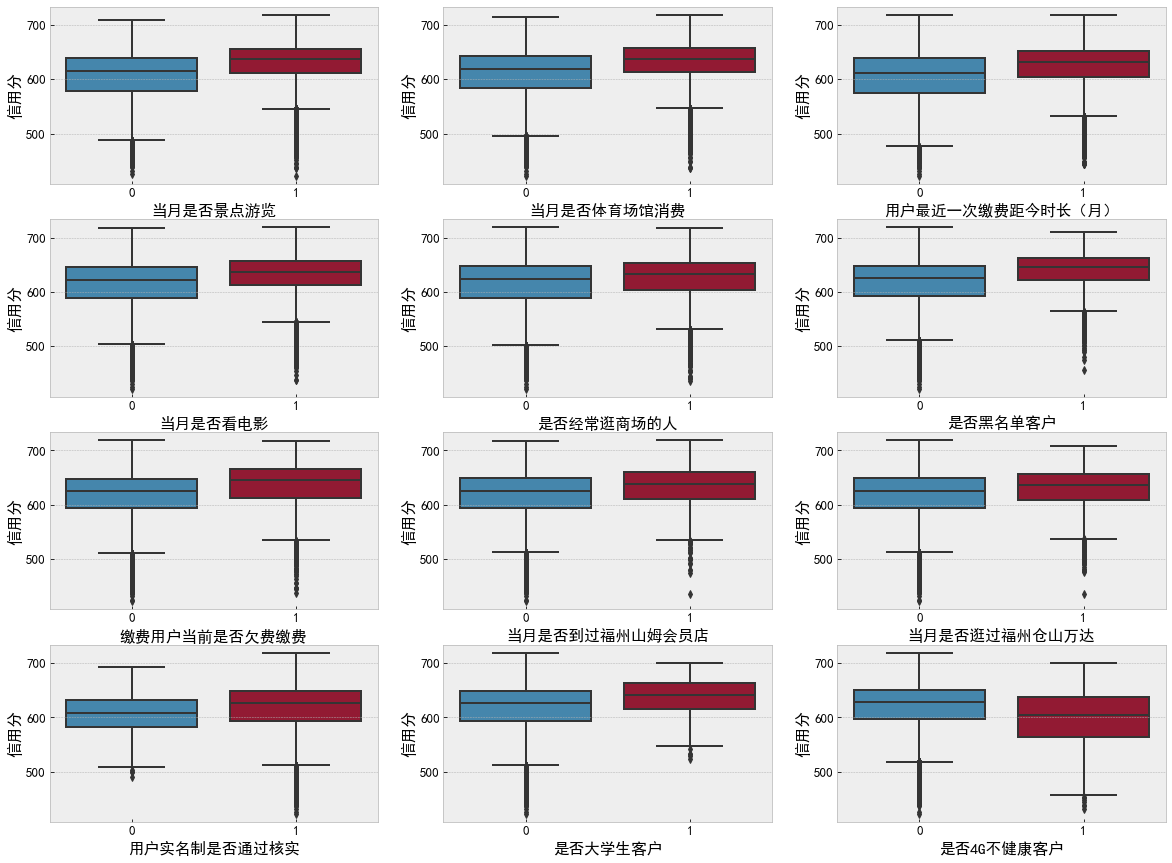

In [92]:
# 离散值特征
name_list = ['当月是否景点游览','当月是否体育场馆消费','用户最近一次缴费距今时长（月）', '当月是否看电影',
             '是否经常逛商场的人','是否黑名单客户','缴费用户当前是否欠费缴费','当月是否到过福州山姆会员店',
             '当月是否逛过福州仓山万达', '用户实名制是否通过核实','是否大学生客户','是否4G不健康客户']

f, ax = plt.subplots(4, 3, figsize=(20, 15))

for i,name in enumerate(name_list):
    sns.boxplot(data=train, x=name, y='信用分',ax=ax[i // 3][i % 3])
plt.show()

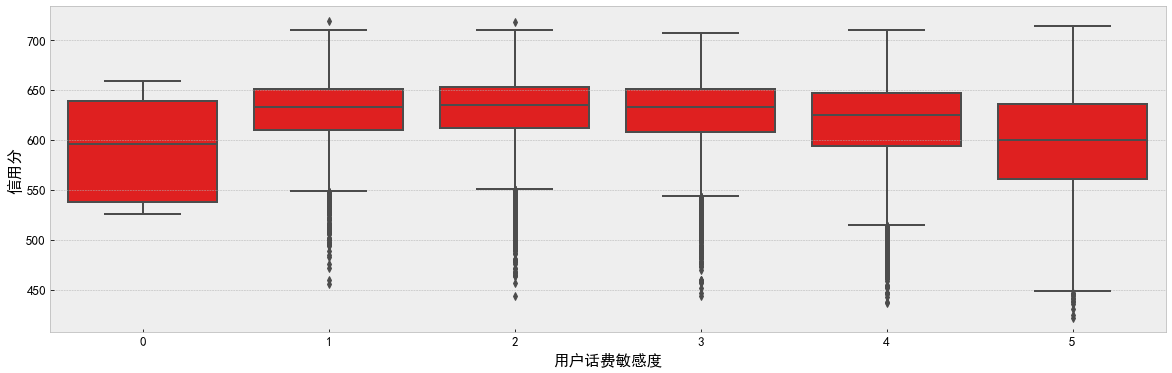

In [93]:
# 离散值特征
f, ax = plt.subplots( figsize=(20, 6))
sns.boxplot(data=train, x='用户话费敏感度', y='信用分', color='r')
plt.show()

## 对数据做基本处理，再次观察单变量相关关系

In [62]:
#对于 transform_value_feature + user_fea + log_features 在0.1% 和 99.9% 处进行截断，处理离群点
#对于 user_fea + log_features 进行偏态处理，进行对数转换


#def base_process():
    
#    train_temp=train.copy()
    
#    transform_value_feature=['用户年龄','用户网龄（月）','当月通话交往圈人数',
#                              '近三个月月均商场出现次数','当月网购类应用使用次数','当月物流快递类应用使用次数',
#                              '当月金融理财类应用使用总次数','当月视频播放类应用使用次数', '当月飞机类应用使用次数',
#                              '当月火车类应用使用次数','当月旅游资讯类应用使用次数']
#    user_fea=['缴费用户最近一次缴费金额（元）','用户近6个月平均消费值（元）','用户账单当月总费用（元）','用户当月账户余额（元）']
#    
#    log_features=['当月网购类应用使用次数','当月金融理财类应用使用总次数','当月视频播放类应用使用次数']
#    
#     #处理离群点.这里我们将大于99.9%的数据直接赋值对应99.9%的值，将小于0.1%的数据直接赋值0.1%对应的值
#    for col in transform_value_feature+user_fea+log_features:
#        ulimit=np.percentile(train_temp[col].values, 99.9) #计算一个多维数组的任意百分比分位数
#        llimit=np.percentile(train_temp[col].values, 0.1)
#        train_temp.loc[train_temp[col]>ulimit,col]=ulimit  # 大于99.9%的直接赋值
#        train_temp.loc[train_temp[col]<llimit,col]=llimit
#        
#    for col in user_fea+log_features:
#        train_temp[col]=train_temp[col].map(lambda x: np.log1p(x)) #取对数变化
#        
#    return train_temp
#
#train_df=base_process()
#train_df.head()

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,用户当月账户余额（元）,缴费用户当前是否欠费缴费,用户话费敏感度,当月通话交往圈人数,是否经常逛商场的人,近三个月月均商场出现次数,当月是否逛过福州仓山万达,当月是否到过福州山姆会员店,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44.0,0,0,0,186.0,1,4.613138,5.105097,5.076423,5.198497,0,3,83.0,1,75.0,0,0,0,1,1,6.570883,0.0,7.916078,8.874308,0.0,0.0,30.0,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18.0,0,0,1,5.0,1,3.432050,5.038769,4.984291,4.709530,0,3,21.0,1,16.0,0,0,0,0,0,6.028279,0.0,7.912789,10.711369,0.0,0.0,0.0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47.0,0,0,0,145.0,1,3.929863,4.706282,4.797442,4.262680,0,1,59.0,0,1.0,0,0,0,0,0,8.129175,0.0,0.000000,8.477412,0.0,0.0,1.0,643
3,43c64379d3c24a15b8478851b22049e4,1,55.0,0,0,0,234.0,1,4.613138,4.542976,5.126461,4.510860,0,3,78.0,1,26.0,0,0,0,1,1,6.216606,0.0,7.566311,8.052615,0.0,0.0,5.0,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40.0,0,0,0,76.0,1,3.929863,4.569232,4.624973,4.394449,0,3,70.0,1,44.0,0,0,0,1,0,6.259581,0.0,4.174387,4.094345,0.0,0.0,0.0,648


**经过数据处理之后再次进行相关度测量**

Text(0.5, 1.0, 'Correlation coefficient of the variables')

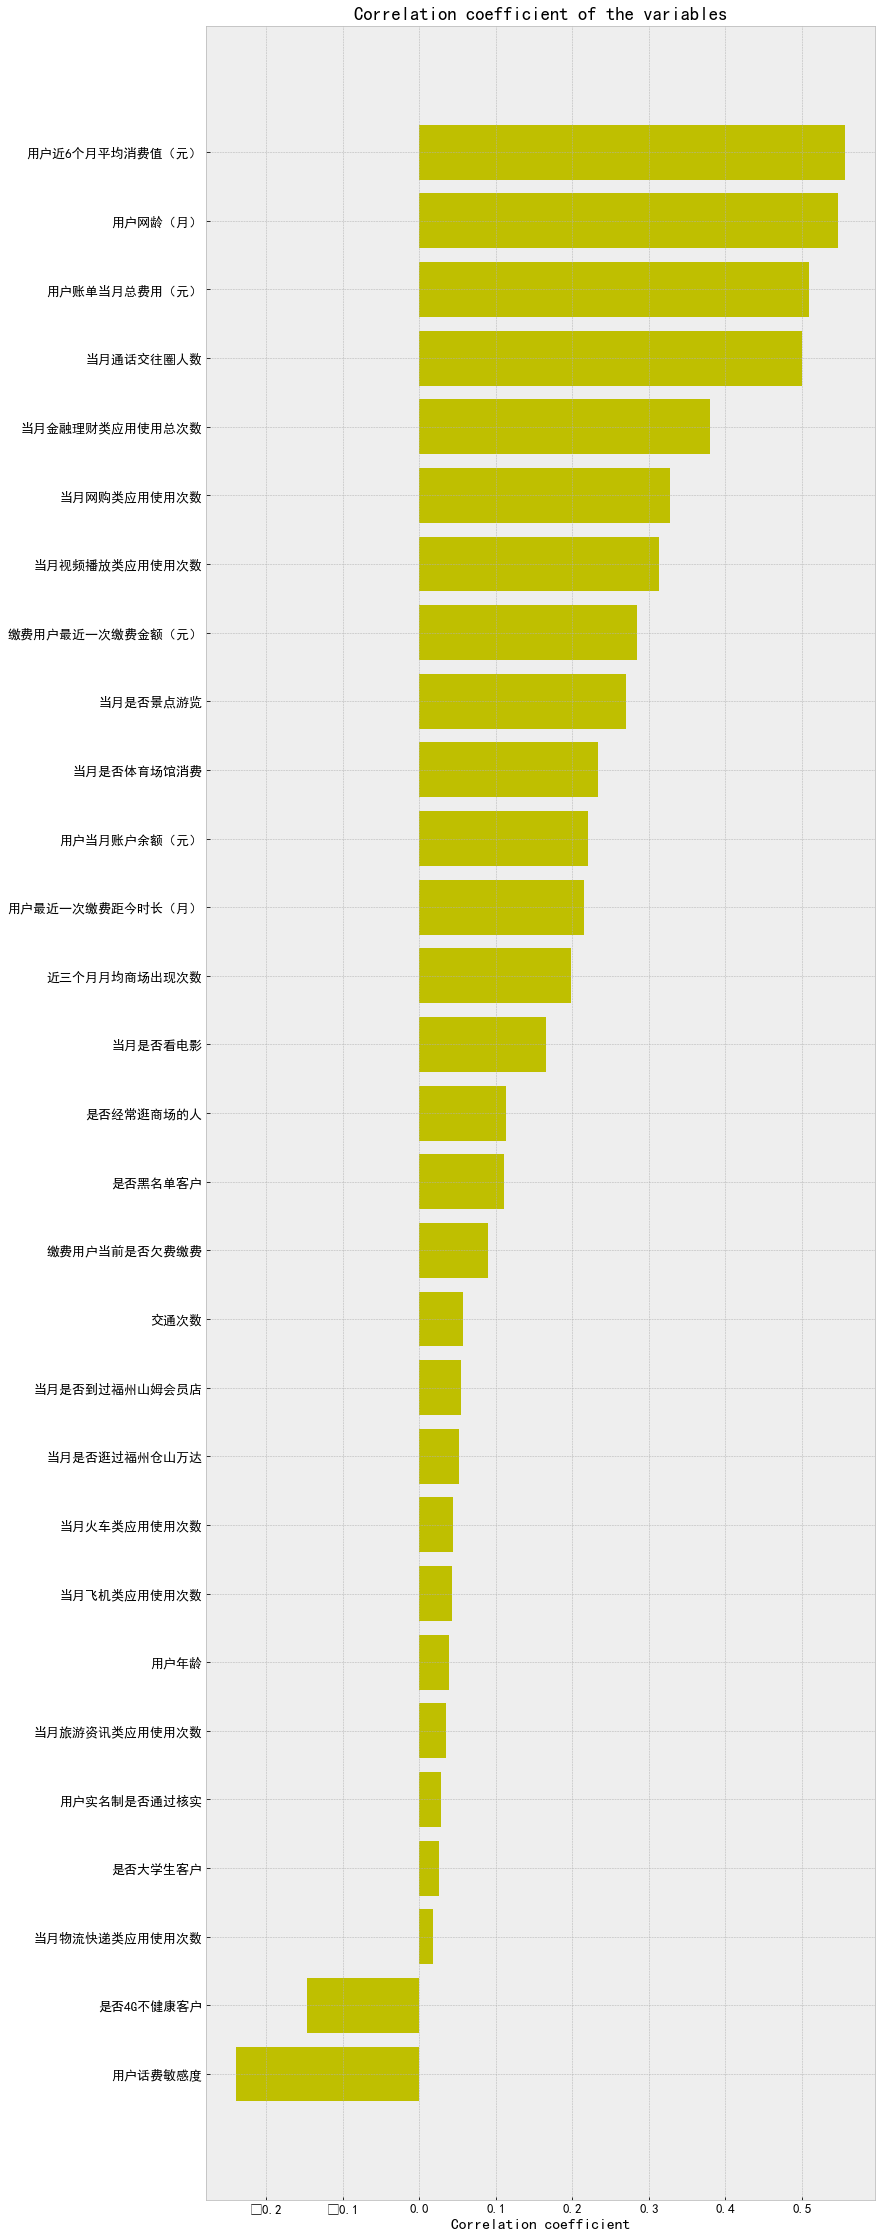

In [63]:
#train_df['交通次数']=train_df['当月飞机类应用使用次数']+train_df['当月火车类应用使用次数']
#
#x_cols=[col for col in train_df.columns if col not in ['信用分'] if train_df[col].dtype!='object']
#
#labels=[]
#values=[]
#for col in x_cols:
#    labels.append(col)
#    values.append(np.corrcoef(train_df[col].values,train_df.信用分.values)[0,1])
#corr_df=pd.DataFrame({'col_labels':labels,'corr_values':values})
#corr_df=corr_df.sort_values(by='corr_values')
#
#ind=np.arange(len(labels))
#width=0.5
#fig,ax=plt.subplots(figsize=(12,40))
#rects=ax.barh(ind,corr_df.corr_values.values,color='y')
#ax.set_yticks(ind)
#ax.set_yticklabels(corr_df.col_labels.values,rotation='horizontal')
#ax.set_xlabel('Correlation coefficient')
#ax.set_title('Correlation coefficient of the variables')

可以发现诸如“用户近6个月平均消费值”、“当月童话交往人数”等特征与目标特征的相关性经过取对数后变强了。

取对数还是有益的

**所有连续变量之间两两相关关系**

Text(0.5, 1, 'Important Variables correlation map')

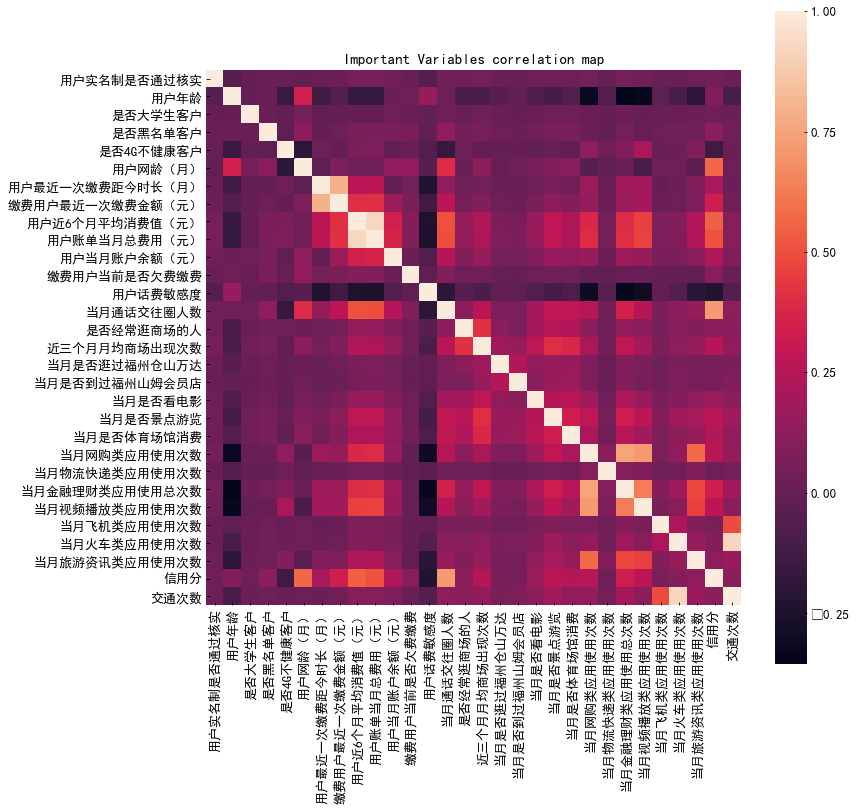

In [104]:
corrmat=train_df.corr(method='spearman')

f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,vmax=1,square=True)
plt.title('Important Variables correlation map',fontsize=15)

# 最终确定的初级探索工程代码

In [105]:
""" 
为什么只取消一个特征的拖尾，其它特征拖尾为什么保留，即使线下提高分数也要
保留，这是因为在线下中比如逛商场拖尾的数据真实场景下可能为保安，在
训练集中可能只有一个保安，所以去掉以后线下验证会提高，但是在测试集
中也存在一个保安，如果失去拖尾最终会导致测试集保安信用分精度下降 
"""
    
data.drop(data[data['当月通话交往圈人数'] > 1750].index, inplace=True)
data.reset_index(drop=True, inplace=True)


""" 0替换np.nan，通过线下验证发现数据实际情况缺失值数量大于0值数量，np.nan能更好的还原数据真实性 """
na_list = ['用户年龄', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）','用户账单当月总费用（元）']
for na_fea in na_list:
    data[na_fea].replace(0, np.nan, inplace=True)

""" 话费敏感度0替换，通过线下验证发现替换为中位数能比np.nan更好的还原数据真实性 """
data['用户话费敏感度'].replace(0, data['用户话费敏感度'].mode()[0], inplace=True)

# 中级特征探索（数据预工程）

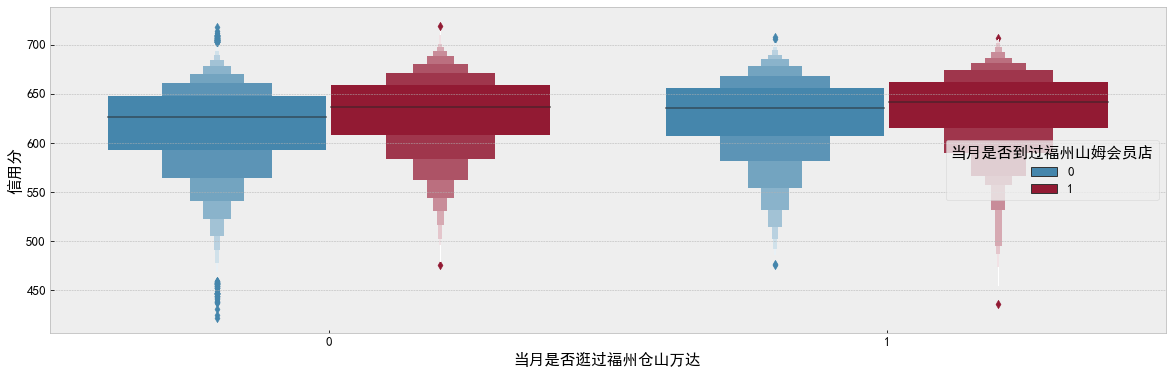

In [106]:
f, ax = plt.subplots(figsize=(20, 6))
sns.boxenplot(data=data, x='当月是否逛过福州仓山万达', y='信用分', hue='当月是否到过福州山姆会员店', ax=ax)
plt.show()

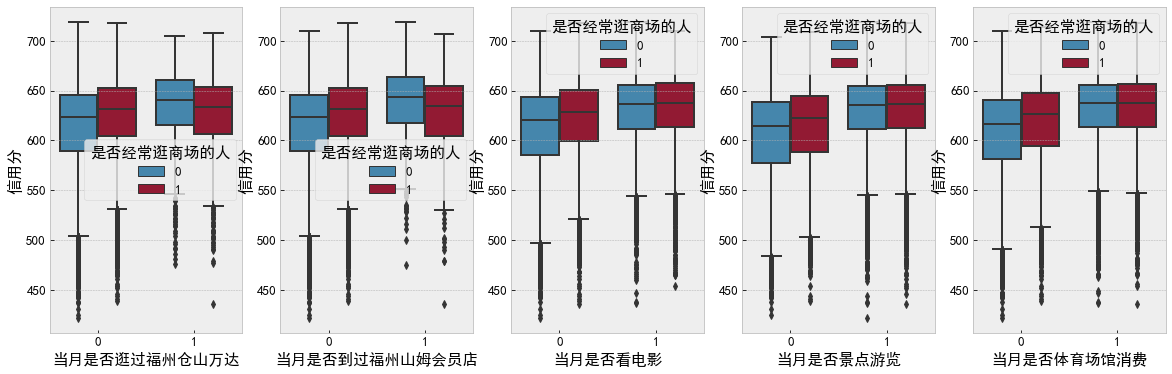

In [107]:
""" 离散型探索 """
f, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(1, 5, figsize=(20, 6))

sns.boxplot(data=data, x='当月是否逛过福州仓山万达', y='信用分', hue='是否经常逛商场的人', ax=ax0)
sns.boxplot(data=data, x='当月是否到过福州山姆会员店', y='信用分', hue='是否经常逛商场的人', ax=ax1)
sns.boxplot(data=data, x='当月是否看电影', y='信用分', hue='是否经常逛商场的人', ax=ax2)
sns.boxplot(data=data, x='当月是否景点游览', y='信用分', hue='是否经常逛商场的人', ax=ax3)
sns.boxplot(data=data, x='当月是否体育场馆消费', y='信用分', hue='是否经常逛商场的人', ax=ax4)
plt.show()

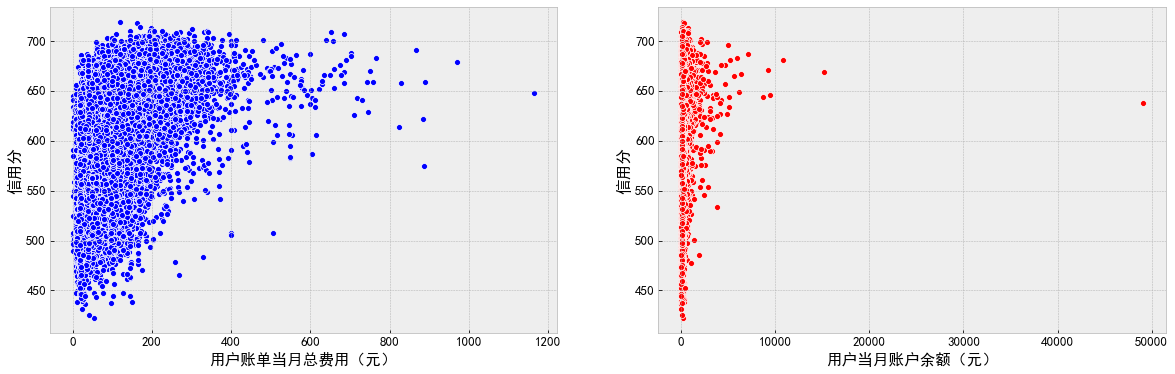

In [108]:
""" 连续型探索 """
f, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=data, x='用户账单当月总费用（元）', y='信用分', color='b', ax=ax[0])
sns.scatterplot(data=data, x='用户当月账户余额（元）', y='信用分', color='r', ax=ax[1])
plt.show()


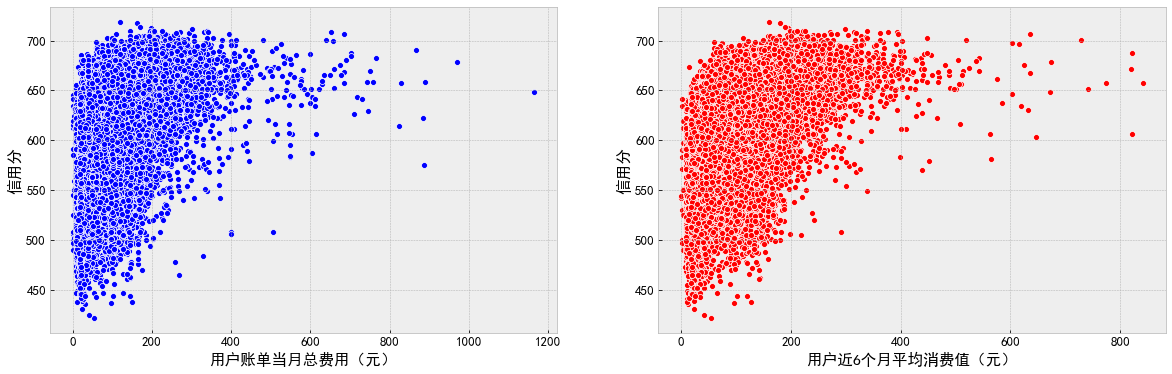

In [109]:
f, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=data, x='用户账单当月总费用（元）', y='信用分', color='b', ax=ax[0])
sns.scatterplot(data=data, x='用户近6个月平均消费值（元）', y='信用分', color='r', ax=ax[1])
plt.show()


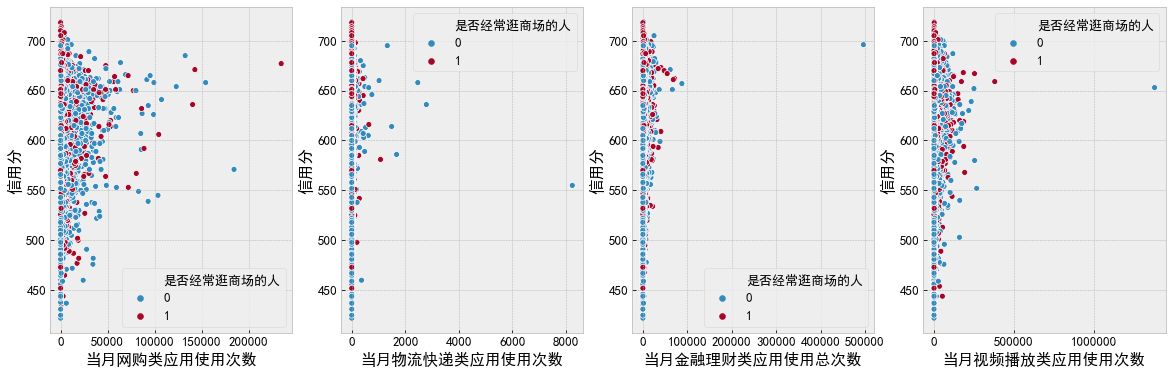

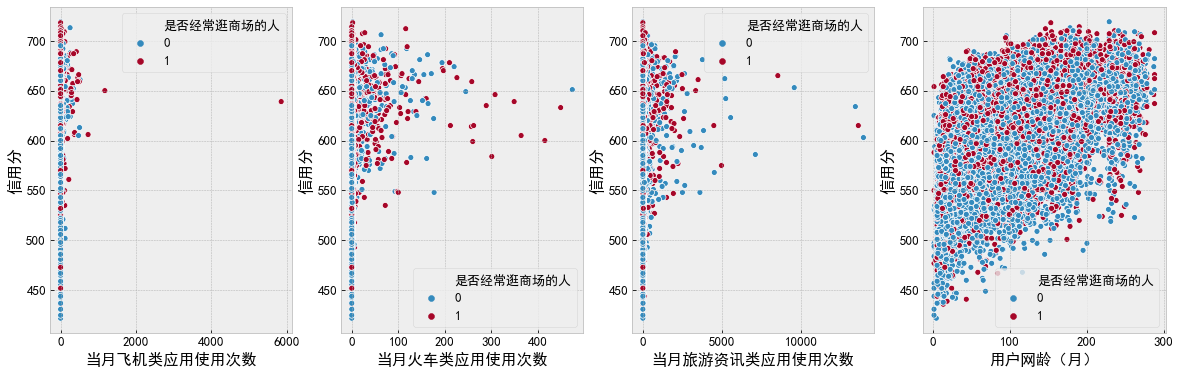

In [111]:
f, [ax0, ax1, ax2, ax3] = plt.subplots(1, 4, figsize=(20, 6))
sns.scatterplot(data=data, x='当月网购类应用使用次数', y='信用分', hue='是否经常逛商场的人', ax=ax0)
sns.scatterplot(data=data, x='当月物流快递类应用使用次数', y='信用分', hue='是否经常逛商场的人', ax=ax1)
sns.scatterplot(data=data, x='当月金融理财类应用使用总次数', y='信用分', hue='是否经常逛商场的人', ax=ax2)
sns.scatterplot(data=data, x='当月视频播放类应用使用次数', y='信用分', hue='是否经常逛商场的人', ax=ax3)
plt.show()

f, [ax0, ax1, ax2, ax3] = plt.subplots(1, 4, figsize=(20, 6))
sns.scatterplot(data=data, x='当月飞机类应用使用次数', y='信用分', hue='是否经常逛商场的人', ax=ax0)
sns.scatterplot(data=data, x='当月火车类应用使用次数', y='信用分', hue='是否经常逛商场的人', ax=ax1)
sns.scatterplot(data=data, x='当月旅游资讯类应用使用次数', y='信用分', hue='是否经常逛商场的人', ax=ax2)
sns.scatterplot(data=data, x='用户网龄（月）', y='信用分', hue='是否经常逛商场的人', ax=ax3)
plt.show()


# 最终确定的中级探索工程代码

In [112]:
""" x / (y + 1) 避免无穷值Inf，采用高斯平滑 + 1 """
data['话费稳定'] = data['用户账单当月总费用（元）'] / (data['用户当月账户余额（元）'] + 1)  
##看importance，当月话费 和最近半年平均话费都很高，算一下当月/半年 -->稳定性
data['相比稳定'] = data['用户账单当月总费用（元）'] / (data['用户近6个月平均消费值（元）'] + 1)
##该用户最近一次缴纳的钱能不能承担起他平时月均的消费
data['缴费稳定'] = data['缴费用户最近一次缴费金额（元）'] / (data['用户近6个月平均消费值（元）'] + 1)


data['当月是否去过豪华商场'] = (data['当月是否逛过福州仓山万达'] + data['当月是否到过福州山姆会员店']).map(lambda x: 1 if x > 0 else 0)
data['应用总使用次数'] = data['当月网购类应用使用次数'] + data['当月物流快递类应用使用次数'] + data['当月金融理财类应用使用总次数'] 
                       + data['当月视频播放类应用使用次数'] + data['当月飞机类应用使用次数'] + data['当月火车类应用使用次数'] 
                       + data['当月旅游资讯类应用使用次数']


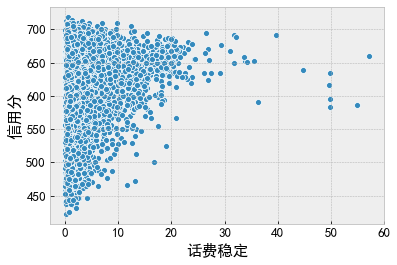

In [113]:
sns.scatterplot(data=data, x='话费稳定', y='信用分')

In [2]:
# 挖掘新特征的过程要耗费大量时间去证明猜想，在这个过程中会得到很多无用特征


#age and net_age_in_month ---> 入网时的年龄 --- useless
#先前余额，当前余额 + 当月话费 - 上次缴费 --- useless
#充值金额/余额 --- useless
#当月话费/最近充值金额 --- useless
#六个月均值/充值金额 --- useless

# 高级特征探索（数据真场景）

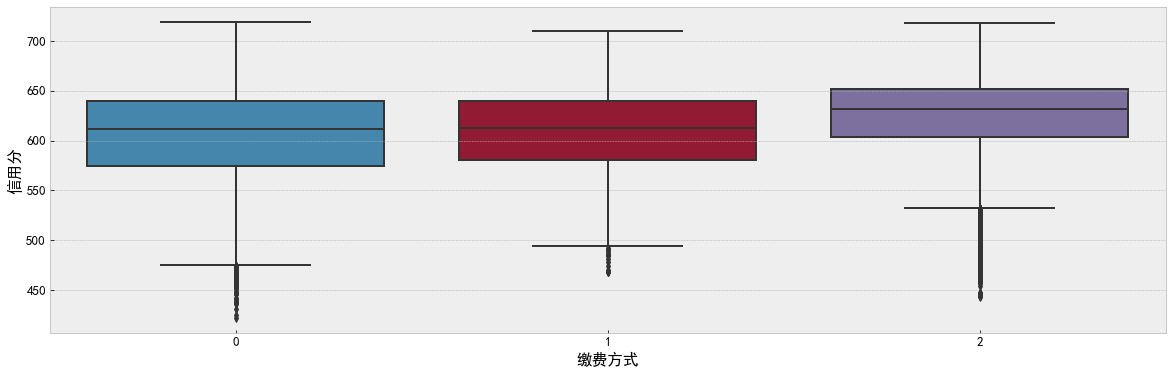

In [114]:
data['缴费方式'] = 0
data.loc[(data['缴费用户最近一次缴费金额（元）'] != 0) & (data['缴费用户最近一次缴费金额（元）'] % 10 == 0), '缴费方式'] = 1
data.loc[(data['缴费用户最近一次缴费金额（元）'] != 0) & (data['缴费用户最近一次缴费金额（元）'] % 10 > 0), '缴费方式'] = 2

f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=data, x='缴费方式', y='信用分', ax=ax)
plt.show()

**2、充分利用外部信息，让特征具有实际场景意义**

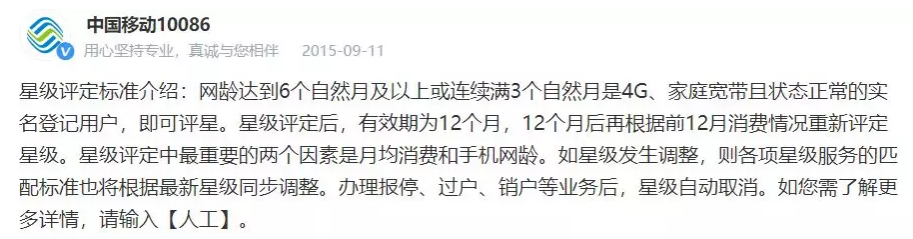

In [120]:
from IPython.display import Image

Image("中国移动.png")

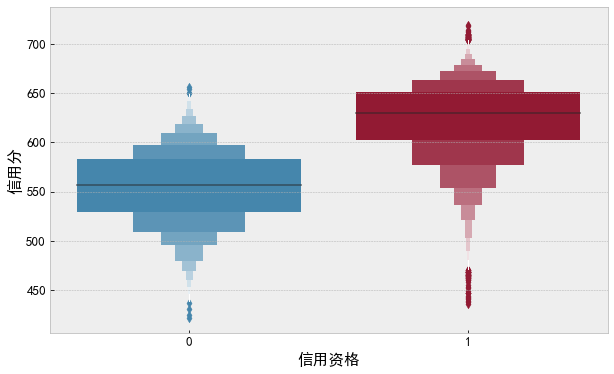

In [121]:
data['信用资格'] = data['用户网龄（月）'].apply(lambda x: 1 if x > 12 else 0)

f, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(data=data, x='信用资格', y='信用分', ax=ax)
plt.show()

# 算法模型

In [123]:
lab = '信用分'

X = data.loc[data[lab].notnull(), (data.columns != lab) & (data.columns != '用户编码')]
y = data.loc[data[lab].notnull()][lab]
X_pred = data.loc[data[lab].isnull(), (data.columns != lab) & (data.columns != '用户编码')]

**模型参数**

In [125]:
""" 模型参数为作者祖传参数 """
lgb_param_l1 = {
    'learning_rate': 0.01, #梯度下降的步长
    'boosting_type': 'gbdt',#梯度提升决策树
    'objective': 'regression_l1', #任务目标（L1 loss, alias=mean_absolute_error, mae）
    'metric': 'mae',
    'min_child_samples': 46,# 一个叶子上数据的最小数量
    'min_child_weight': 0.01,
    'feature_fraction': 0.6,#每次迭代中选择前60%的特征
    'bagging_fraction': 0.8,#不进行重采样的情况下随机选择部分数据
    'bagging_freq': 2, #每2次迭代执行bagging
    'num_leaves': 31,#一棵树上的叶子数
    'max_depth': 5,#树的最大深度
    'lambda_l2': 1, # 表示的是L2正则化
    'lambda_l1': 0,# 表示的是L1正则化
    'n_jobs': -1,
    'seed': 4590,
}


In [ ]:
n_fold = 5
y_counts = 0
y_scores = np.zeros(5)
y_pred_l1 = np.zeros([5, X_pred.shape[0]])
y_pred_all_l1 = np.zeros(X_pred.shape[0])

for n in range(1): 
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=2019 + n)
    kf = kfold.split(X, y)
    
    for i, (train_iloc, test_iloc) in enumerate(kf):
        print("{}、".format(i + 1), end='')
        X_train, X_test, y_train, y_test = X.iloc[train_iloc, :], X.iloc[test_iloc, :], y[train_iloc], y[test_iloc]
        #print(len(y_test))
        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_valid = lgb.Dataset(X_test, y_test, reference=lgb_train)
        lgb_model = lgb.train(train_set=lgb_train, valid_sets=lgb_valid, feval=feval_lgb, 
                               params=lgb_param_l1,num_boost_round=6000, verbose_eval=-1, early_stopping_rounds=100)
        y_scores[y_counts] = lgb_model.best_score['valid_0']['acc_score']
        y_pred_l1[y_counts] = lgb_model.predict(X_pred, num_iteration=lgb_model.best_iteration)
        y_pred_all_l1 += y_pred_l1[y_counts]
        y_counts += 1

y_pred_all_l1 /= y_counts
print(y_scores, y_scores.mean())


In [1]:
from sklearn.metrics import mean_absolute_error

def feval_lgb(y_pred, train_data):
    y_true = train_data.get_label()
    #y_pred = np.argmax(y_pred.reshape(7, -1), axis=0)
    
    score = 1 / (1 + mean_absolute_error(y_true, y_pred))
    return 'acc_score', score, True  

# 模型融合

In [127]:
lgb_param_l1 = {

    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': 'None',
    'min_child_samples': 46,
    'min_child_weight': 0.01,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 2,
    'num_leaves': 31,
    'max_depth': 5,
    'lambda_l2': 1,
    'lambda_l1': 0,
    'n_jobs': -1,
    'seed': 4590,
}

lgb_param_l2 = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'metric': 'None',
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 2,
    'num_leaves': 40,
    'max_depth': 7,
    'lambda_l2': 1,
    'lambda_l1': 0,
    'n_jobs': -1,
}


In [ ]:
submit = pd.DataFrame()
submit['id'] = df_data[df_data['信用分'].isnull()]['用户编码']
submit['score1'] = y_pred_all_l1
#submit['score2'] = y_pred_all_l2

submit = submit.sort_values('score1')
submit['rank'] = np.arange(submit.shape[0])

min_rank = 100
max_rank = 50000 - min_rank

l1_ext_rate = 1
# l2_ext_rate = 1 - l1_ext_rateil_ext = (submit['rank'] <= min_rank) | (submit['rank'] >= max_rank)
l2_ext_rate  = (submit['rank'] <= min_rank) | (submit['rank'] >= max_rank)

l1_not_ext_rate = 0.5
l2_not_ext_rate = (submit['rank'] > min_rank) & (submit['rank'] < max_rank)

submit['score'] = 0
submit.loc[il_ext, 'score'] = (submit[il_ext]['score1'] * l1_ext_rate + submit[il_ext]['score2'] * l2_ext_rate + 1 + 0.25)
submit.loc[il_not_ext, 'score'] = submit[il_not_ext]['score1'] * l1_not_ext_rate + submit[il_not_ext]['score2'] * l2_not_ext_rate + 0.25
""" 输出文件 """
submit[['id', 'score']].to_csv('submit.csv')
